#1. Habilitar Drive


In [5]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#2. Importar librerias


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#3. Cargar clasificador Haar


In [0]:
face_cascade= cv2.CascadeClassifier('/content/drive/My Drive/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/My Drive/Computer_vision/Images/caras.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#4. Detectar rostros en la Imagen



In [0]:
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))
print(faces)

[[252  41  73  73]
 [153  43  91  91]
 [323  45  83  83]
 [ 72  51  94  94]
 [  3  55  68  68]
 [400  63  80  80]
 [474  78  86  86]
 [565  83  73  73]]


#5.Dibujamos los cuadros de color verde

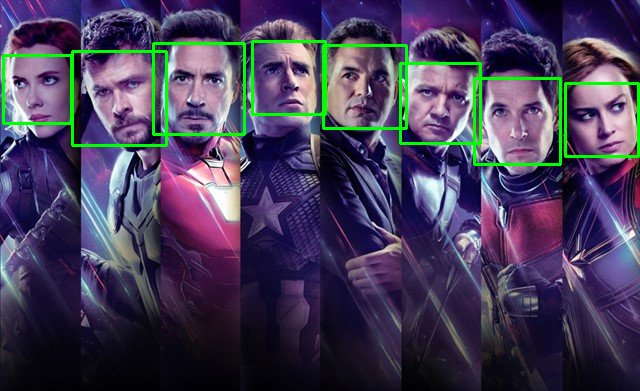

In [0]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2_imshow(img)

Codio full (contador de caras)

[[252  42  73  73]
 [  2  54  69  69]
 [150  42  96  96]
 [320  42  85  85]
 [397  61  85  85]
 [ 76  54  89  89]
 [569  84  69  69]
 [474  78  87  87]]


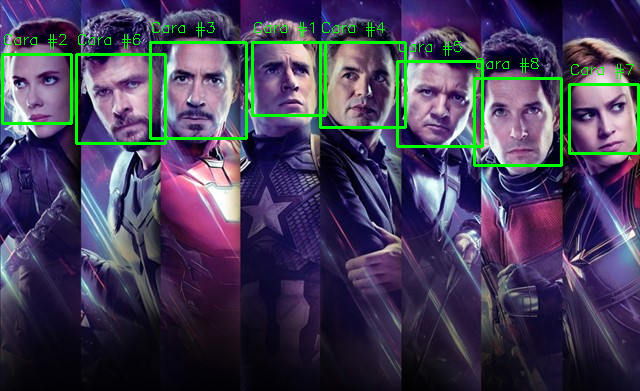

True

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/My Drive/Computer_vision/Images/caras.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,2);
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  idx += 1
  cv2.putText(img,"Cara #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/My Drive/Computer_vision/Images/caras_detectadas.jpg',img)

#Trabajando con videos


In [30]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/Computer_vision/Images/familia_cantando.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [31]:
videoentrada = cv2.VideoCapture('/content/drive/My Drive/Computer_vision/Images/familia_cantando.mp4')
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada.get(3))+"x"+str(videoentrada.get(4))+" pixeles")

total de frames: 1412
640.0x360.0 pixeles


#Extrayendo por frames


In [0]:
#recorremos los 6 primeros frames de 1412
for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  cv2_imshow(frame)

In [0]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');

while(videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x, y, w, h) in faces:
      cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
      cv2_imshow(frame)
  else:
    break
videoentrada.release()

In [0]:
pip install pyprind

In [0]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r %d frames | %d segundos transcurrido" %
                    (percent, duration))
    sys.stdout.flush()

In [43]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/Computer_vision/Images/familia_cantando.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/Computer_vision/Images/familia_cantando_haar2.avi',
                              codec, 20.0,(640,360))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
videoentrada.release()
videosalida.release()


 99 frames | 234 segundos transcurrido

#CUERPOS COMPLETOS

In [58]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/Computer_vision/Images/PersonasCaminando.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [61]:
videoentrada = cv2.VideoCapture('/content/drive/My Drive/Computer_vision/Images/PersonasCaminando.mp4')
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada.get(3))+"x"+str(videoentrada.get(4))+" pixeles")

total de frames: 411
1280.0x720.0 pixeles


In [62]:
#recorremos los 6 primeros frames de 1412
for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.

In [63]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Computer_vision/Python_files/HaarCascade/haarcascade_fullbody.xml');

while(videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x, y, w, h) in faces:
      cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
      cv2_imshow(frame)
  else:
    break
videoentrada.release()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r %d frames | %d segundos transcurrido" %
                    (percent, duration))
    sys.stdout.flush()

In [66]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Computer_vision/Python_files/HaarCascade/haarcascade_fullbody.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/Computer_vision/Images/PersonasCaminando.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/Computer_vision/Images/PersonasCaminando_FullBody.avi',
                              codec, 30.0,(1280,720))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
videoentrada.release()
videosalida.release()

 29 frames | 221 segundos transcurrido